In [1]:
#instalar bibliotecas
# !pip install geopandas
# !pip install geobr

In [2]:
#importar bibliotecas
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geobr
df = pd.read_csv("PARTICIPANTES_2024.csv", low_memory=False, encoding='latin1', sep=";")

In [3]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'Q001', 'Q002',
       'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011',
       'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020',
       'Q021', 'Q022', 'Q023'],
      dtype='object')

In [4]:
df_filter = df[df["SG_UF_PROVA"] == "SP"]
df_filter.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,...,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023
28,210062064373,2024,4,F,1,1,1,2,0,NaN,...,B,A,B,B,B,A,B,A,D,A
37,210062064382,2024,3,F,1,1,1,2,0,1.0,...,A,B,B,B,C,B,B,B,D,A
60,210062064405,2024,11,M,1,1,1,1,9,NaN,...,A,B,B,B,D,A,B,C,E,A
69,210062064420,2024,8,F,1,3,1,1,6,NaN,...,A,A,B,A,B,A,B,B,B,A
97,210062064498,2024,6,F,1,1,1,1,3,NaN,...,A,B,B,A,B,A,B,B,D,A


In [5]:
df_filter = df_filter[[
    "TP_FAIXA_ETARIA",
    "TP_SEXO",
    "TP_COR_RACA",
    "TP_ST_CONCLUSAO",
    "TP_ANO_CONCLUIU",
    "IN_TREINEIRO",
    "CO_MUNICIPIO_PROVA",
    "SG_UF_PROVA",
    "Q007",
    "Q023"
]]

In [6]:
df_filter = df_filter[pd.notna(df_filter["CO_MUNICIPIO_PROVA"])]

In [7]:
df_filter = df_filter[df_filter["IN_TREINEIRO"] == 0]


In [8]:
df_filter

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,IN_TREINEIRO,CO_MUNICIPIO_PROVA,SG_UF_PROVA,Q007,Q023
28,4,F,1,2,0,0,3550308,SP,D,A
37,3,F,1,2,0,0,3550308,SP,B,A
60,11,M,1,1,9,0,3530607,SP,O,A
69,8,F,3,1,6,0,3548708,SP,C,A
97,6,F,1,1,3,0,3509007,SP,E,A
...,...,...,...,...,...,...,...,...,...,...
4332888,13,F,1,1,18,0,3550308,SP,E,B
4332891,14,F,1,1,18,0,3550308,SP,J,A
4332893,2,F,2,2,0,0,3550308,SP,C,A
4332912,3,F,2,2,0,0,3550308,SP,E,A


In [9]:
df = df_filter.copy()
renda_media = {
    "A": 0.00,
    "B": 706.00,
    "C": 1765.01,
    "D": 2471.01,
    "E": 3177.01,
    "F": 3883.01,
    "G": 4589.01,
    "H": 5295.01,
    "I": 6354.01,
    "J": 7766.01,
    "K": 9178.01,
    "L": 11296.01,
    "M": 13414.01,
    "N": 15532.01,
    "O": 18356.01,
    "P": 24004.01,
    "Q": 28240.00  # Acima de R$ 28.240,00 — sem média definida
}
df["RENDA_MEDIA"] = df["Q007"].map(renda_media)

In [10]:
df_q023_expandido = pd.get_dummies(df["Q023"], prefix="Q023")

In [11]:
df = pd.concat([df, df_q023_expandido], axis=1)

In [12]:
df.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'IN_TREINEIRO', 'CO_MUNICIPIO_PROVA', 'SG_UF_PROVA',
       'Q007', 'Q023', 'RENDA_MEDIA', 'Q023_A', 'Q023_B', 'Q023_C', 'Q023_D',
       'Q023_E', 'Q023_F'],
      dtype='object')

In [13]:
df.columns = ['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'IN_TREINEIRO', 'CO_MUNICIPIO_PROVA', 'SG_UF_PROVA',
       'Q007', 'Q023', 'RENDA_MEDIA', 'Escola Pública', 'Escola Pública e Particular sem bolsa', 'Escola Pública e Particular com bolsa', 'Escola Particular Sem bolsa',
       'Escola Particula com bolsa', 'Q023_F']

In [14]:
# Escola Pública e Particular (com ou sem bolsa)
# Criar a coluna combinada
df["Escola Pública e Particular"] = (
    df["Escola Pública e Particular sem bolsa"] |
    df["Escola Pública e Particular com bolsa"]
)

# Remover as colunas antigas
df.drop(columns=["Escola Pública e Particular sem bolsa", 
                 "Escola Pública e Particular com bolsa"], inplace=True)


# Criar a coluna combinada
df["Escola Particular"] = (
    df["Escola Particular Sem bolsa"] |
    df["Escola Particula com bolsa"]
)

# Remover as colunas antigas
df.drop(columns=["Escola Particular Sem bolsa", 
                 "Escola Particula com bolsa"], inplace=True)



In [15]:
df=df[df["TP_FAIXA_ETARIA"] <11]

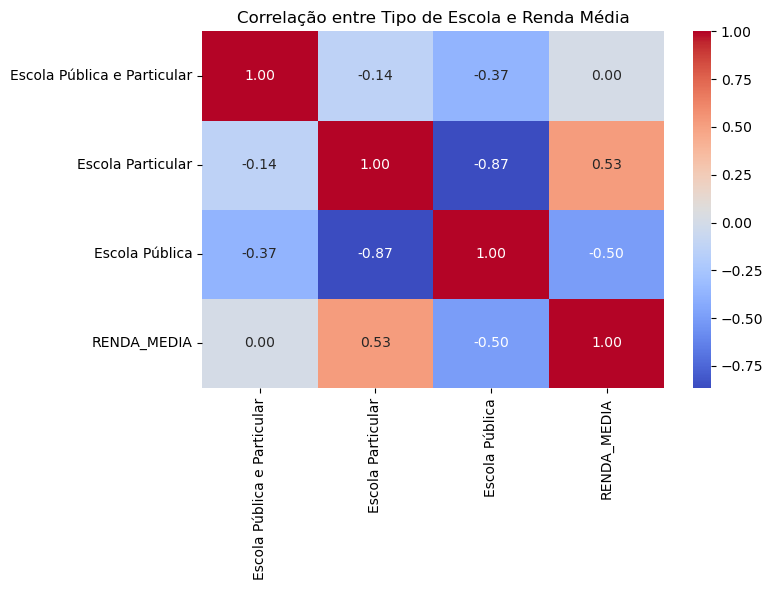

In [16]:
# Selecionar as colunas desejadas
colunas = ["Escola Pública e Particular", "Escola Particular", "Escola Pública", "RENDA_MEDIA"]
correlacao = df[colunas].corr()

# Exibir a matriz de correlação
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Tipo de Escola e Renda Média")
plt.tight_layout()
plt.show()

In [17]:
df.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'IN_TREINEIRO', 'CO_MUNICIPIO_PROVA', 'SG_UF_PROVA',
       'Q007', 'Q023', 'RENDA_MEDIA', 'Escola Pública', 'Q023_F',
       'Escola Pública e Particular', 'Escola Particular'],
      dtype='object')

         Escola Pública  Escola Particular
TP_SEXO                                   
F                195174              62612
M                128253              48952


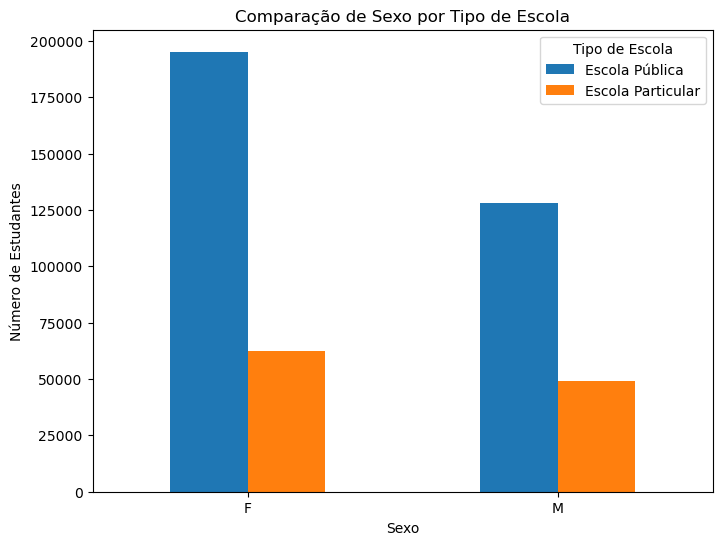

In [18]:
import matplotlib.pyplot as plt

# Tabela de frequência cruzada
tabela = pd.DataFrame({
    "Escola Pública": df.groupby("TP_SEXO")["Escola Pública"].sum(),
    "Escola Particular": df.groupby("TP_SEXO")["Escola Particular"].sum()
})

print(tabela)

# Gráfico de barras lado a lado
tabela.plot(kind="bar", figsize=(8,6))

plt.title("Comparação de Sexo por Tipo de Escola")
plt.xlabel("Sexo")
plt.ylabel("Número de Estudantes")
plt.xticks(rotation=0)
plt.legend(title="Tipo de Escola")
plt.show()


   CO_MUNICIPIO_PROVA TP_SEXO  contagem  percentual
0             3509502       F      6972   58.485026
1             3509502       M      4949   41.514974
2             3518800       F      8260   60.252389
3             3518800       M      5449   39.747611
4             3547809       F      5341   58.003910
5             3547809       M      3867   41.996090
6             3548708       F      5542   57.573239
7             3548708       M      4084   42.426761
8             3550308       F     68554   58.789630
9             3550308       M     48055   41.210370


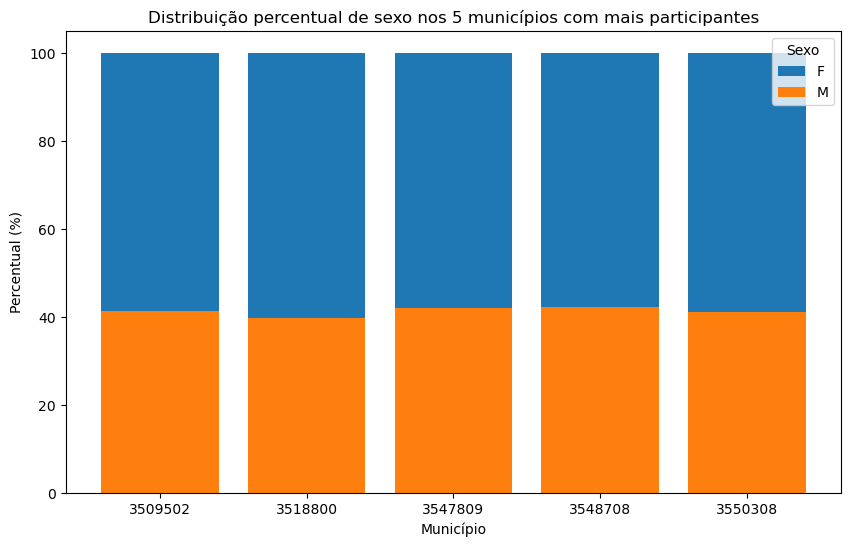

In [19]:
import matplotlib.pyplot as plt

# 1. Descobrir os 5 municípios com mais pessoas
top5_municipios = (
    df["CO_MUNICIPIO_PROVA"]
    .value_counts()
    .head(5)
    .index
)

# Filtrar só os top 5
df_top5 = df[df["CO_MUNICIPIO_PROVA"].isin(top5_municipios)]

# 2. Calcular proporção de M/F em cada município
tabela = (
    df_top5.groupby(["CO_MUNICIPIO_PROVA", "TP_SEXO"])
    .size()
    .reset_index(name="contagem")
)

# Calcular % dentro de cada município
tabela["percentual"] = tabela.groupby("CO_MUNICIPIO_PROVA")["contagem"].transform(lambda x: x / x.sum() * 100)

print(tabela)

# 3. Plotar gráfico
plt.figure(figsize=(10,6))

for sexo in tabela["TP_SEXO"].unique():
    subset = tabela[tabela["TP_SEXO"] == sexo]
    plt.bar(
        subset["CO_MUNICIPIO_PROVA"].astype(str),
        subset["percentual"],
        label=sexo,
        bottom=tabela[tabela["TP_SEXO"] != sexo]["percentual"].values if sexo == "F" else None
    )

plt.title("Distribuição percentual de sexo nos 5 municípios com mais participantes")
plt.xlabel("Município")
plt.ylabel("Percentual (%)")
plt.legend(title="Sexo")
plt.show()


In [20]:
# Contagem de pessoas por município (do maior para o menor)
municipios = df["CO_MUNICIPIO_PROVA"].value_counts()

print(municipios)


CO_MUNICIPIO_PROVA
3550308    116609
3518800     13709
3509502     11921
3548708      9626
3547809      9208
            ...  
3544251       271
3509254       253
3514809       241
3530201       179
3505401        73
Name: count, Length: 210, dtype: int64


In [21]:
#importando dados
df = pd.read_csv("RESULTADOS_2024.csv", encoding="latin-1", sep=";")

In [22]:
df.columns 

Index(['NU_SEQUENCIAL', 'NU_ANO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN',
       'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'],
      dtype='object')

In [23]:
df = df[df["SG_UF_ESC"] ==  "SP"]

In [24]:
df2 = df.groupby("CO_MUNICIPIO_ESC")[['NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC','NU_NOTA_MT', "NU_NOTA_REDACAO"]].mean().reset_index()


In [25]:
# Garantir que a coluna é string
df2["CO_MUNICIPIO_ESC"] = df2["CO_MUNICIPIO_ESC"].astype(str)

# Filtrar apenas municípios que começam com '35'
df2 = df2[df2["CO_MUNICIPIO_ESC"].str.startswith("35")].copy()

print(df2["CO_MUNICIPIO_ESC"].unique())


['3500105.0' '3500204.0' '3500303.0' '3500402.0' '3500501.0' '3500550.0'
 '3500600.0' '3500709.0' '3500758.0' '3500808.0' '3500907.0' '3501004.0'
 '3501103.0' '3501152.0' '3501202.0' '3501301.0' '3501400.0' '3501509.0'
 '3501608.0' '3501707.0' '3501806.0' '3501905.0' '3502002.0' '3502101.0'
 '3502200.0' '3502309.0' '3502408.0' '3502507.0' '3502606.0' '3502705.0'
 '3502754.0' '3502804.0' '3502903.0' '3503000.0' '3503109.0' '3503158.0'
 '3503208.0' '3503307.0' '3503356.0' '3503406.0' '3503505.0' '3503604.0'
 '3503703.0' '3503802.0' '3503901.0' '3503950.0' '3504008.0' '3504107.0'
 '3504206.0' '3504305.0' '3504404.0' '3504503.0' '3504602.0' '3504701.0'
 '3504800.0' '3504909.0' '3505005.0' '3505104.0' '3505203.0' '3505302.0'
 '3505351.0' '3505401.0' '3505500.0' '3505609.0' '3505708.0' '3505807.0'
 '3505906.0' '3506003.0' '3506102.0' '3506201.0' '3506300.0' '3506359.0'
 '3506409.0' '3506508.0' '3506607.0' '3506706.0' '3506805.0' '3506904.0'
 '3507001.0' '3507100.0' '3507159.0' '3507209.0' '3

In [26]:
df2

,CO_MUNICIPIO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,3500105.0,516.982639,543.004575,547.132680,574.146528,674.117647
1,3500204.0,479.976923,489.871429,509.278571,514.984615,540.000000
2,3500303.0,466.114737,489.462136,514.933981,497.971579,577.864078
3,3500402.0,495.275000,532.650000,529.912500,533.700000,670.000000
4,3500501.0,500.446512,533.104348,544.058696,557.473256,648.260870
...,...,...,...,...,...,...
639,3557006.0,493.291451,518.723441,537.638404,530.275130,645.087282
640,3557105.0,528.325822,539.404667,546.511778,585.054930,692.488889
641,3557154.0,477.475000,508.108333,506.508333,567.766667,591.666667
642,3557204.0,454.000000,474.733333,499.937500,473.981818,505.833333


In [27]:
nomes_muni  = pd.read_excel("RELATORIO_DTB_BRASIL_2024_MUNICIPIOS.xlsx")
nomes_muni.columns = ['CO_MUNICIPIO_ESC', 'Nome_Município']
df2["CO_MUNICIPIO_ESC"] = df2["CO_MUNICIPIO_ESC"].astype(float).astype(int).astype(str)
df["CO_MUNICIPIO_PROVA"] = df["CO_MUNICIPIO_PROVA"].astype(str).str.strip()

# -------------------------
# 2. Filtrar df2 apenas para os municípios que existem no df
# -------------------------
municipios_df = df["CO_MUNICIPIO_PROVA"].unique()
df2_filtrado1 = df2[df2["CO_MUNICIPIO_ESC"].isin(municipios_df)].copy()
df2_filtrado1['CO_MUNICIPIO_ESC'] = df2_filtrado1['CO_MUNICIPIO_ESC'].astype(str)
nomes_muni['CO_MUNICIPIO_ESC'] = nomes_muni['CO_MUNICIPIO_ESC'].astype(str)

In [28]:
nomes_muni

,CO_MUNICIPIO_ESC,Nome_Município
0,3500105,Adamantina
1,3500204,Adolfo
2,3500303,Aguaí
3,3500402,Águas da Prata
4,3500501,Águas de Lindóia
...,...,...
640,3556909,Vista Alegre do Alto
641,3556958,Vitória Brasil
642,3557006,Votorantim
643,3557105,Votuporanga


In [29]:

df2_filtrado1 = pd.merge(df2_filtrado1, nomes_muni, on="CO_MUNICIPIO_ESC", how="inner")

# -------------------------
# 3. Colunas de notas
# -------------------------
nota_cols = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]

# Transformar notas em numéricas (caso tenham sido lidas como string)
for col in nota_cols:
    df2_filtrado1[col] = pd.to_numeric(df2_filtrado1[col], errors="coerce")

# -------------------------
# 4. Calcular média das notas por município
# -------------------------
# Cada linha representa a média de todos os alunos daquele município
media_municipio = df2_filtrado1.groupby(["CO_MUNICIPIO_ESC","Nome_Município"])[nota_cols].mean()

# -------------------------
# 5. Ordenar municípios (opcional)
# -------------------------
# Média geral de todas as disciplinas para ordenação
media_municipio["media_geral"] = media_municipio.mean(axis=1)
media_municipio = media_municipio.sort_values(by="media_geral", ascending=False).drop(columns="media_geral")

# -------------------------
# 6. Resultado final
# -------------------------
print("Média de cada município por disciplina:")
print(media_municipio)





Média de cada município por disciplina:
                                          NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  \
CO_MUNICIPIO_ESC Nome_Município                                                
3549102          São João da Boa Vista    541.717970  554.501002  552.419639   
3556206          Valinhos                 545.299006  566.470397  563.880385   
3507001          Boituva                  530.556225  548.906275  553.081176   
3543402          Ribeirão Preto           530.739504  547.208423  552.577750   
3525300          Jaú                      523.233620  543.381818  549.884888   
...                                              ...         ...         ...   
3520301          Iguape                   473.914213  481.342788  504.221154   
3530201          Mirante do Paranapanema  463.751250  490.291463  504.147561   
3529906          Miracatu                 459.846000  474.120183  502.341284   
3514809          Eldorado                 459.228814  472.212903  504.596774   


In [30]:
top3_por_materia = {}

for col in nota_cols:
    # Ordenar médias da disciplina do maior para o menor e pegar os 3 primeiros
    top3_por_materia[col] = media_municipio[col].sort_values(ascending=False).head(3)

# Mostrar resultados
for materia, top3 in top3_por_materia.items():
    print(f"\nTop 3 municípios em {materia}:")
    print(top3)


Top 3 municípios em NU_NOTA_CN:
CO_MUNICIPIO_ESC  Nome_Município       
3556206           Valinhos                 545.299006
3549102           São João da Boa Vista    541.717970
3543402           Ribeirão Preto           530.739504
Name: NU_NOTA_CN, dtype: float64

Top 3 municípios em NU_NOTA_CH:
CO_MUNICIPIO_ESC  Nome_Município       
3556206           Valinhos                 566.470397
3549102           São João da Boa Vista    554.501002
3546603           Santa Fé do Sul          550.376238
Name: NU_NOTA_CH, dtype: float64

Top 3 municípios em NU_NOTA_LC:
CO_MUNICIPIO_ESC  Nome_Município     
3556206           Valinhos               563.880385
3549904           São José dos Campos    555.008245
3518404           Guaratinguetá          554.729984
Name: NU_NOTA_LC, dtype: float64

Top 3 municípios em NU_NOTA_MT:
CO_MUNICIPIO_ESC  Nome_Município       
3556206           Valinhos                 609.201242
3549102           São João da Boa Vista    599.076956
3501905           Ampar

In [31]:
# Calcular a soma das médias das disciplinas para cada município
media_municipio['Média das notas'] = media_municipio[nota_cols].sum(axis=1) / 5

# Ordenar do maior para o menor e pegar os 3 primeiros
top3_geral = media_municipio['Média das notas'].sort_values(ascending=False).head(3)

# Mostrar resultados gerais
print("\nTop 3 municípios no geral (Média das notas):")
print(top3_geral)



Top 3 municípios no geral (Média das notas):
CO_MUNICIPIO_ESC  Nome_Município       
3549102           São João da Boa Vista    594.032091
3556206           Valinhos                 593.644093
3507001           Boituva                  582.325451
Name: Média das notas, dtype: float64


In [32]:
media_municipio.columns

Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Média das notas'],
      dtype='object')

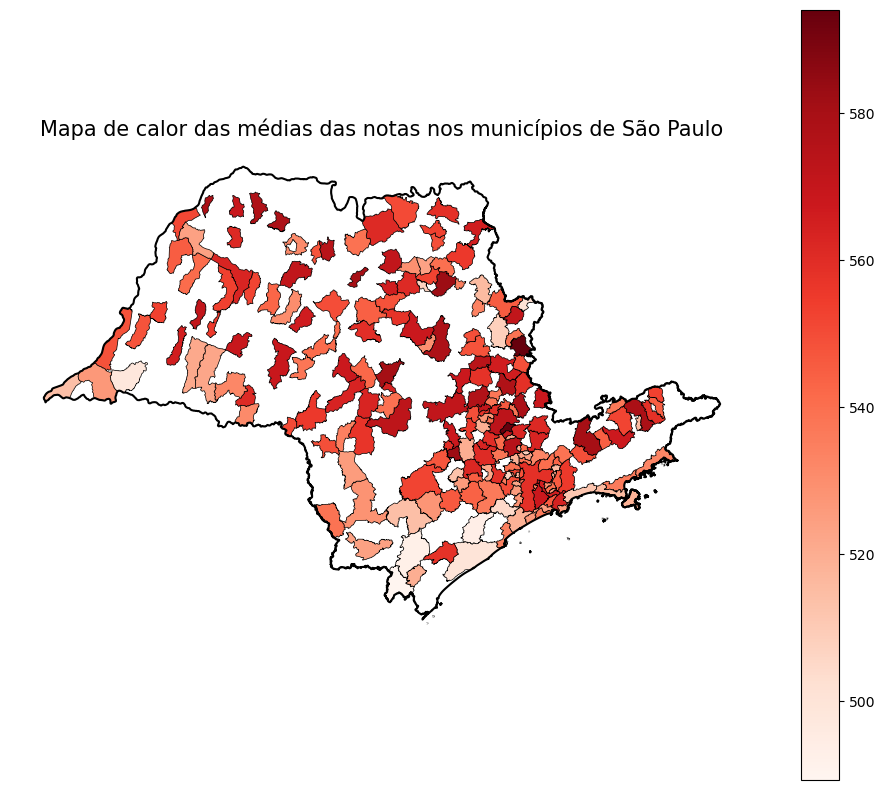

In [33]:
# 1. Importar bibliotecas


# 2. Filtrar municípios presentes nos dados
municipios_df = df["CO_MUNICIPIO_PROVA"].unique()
df2_filtrado = df2[df2["CO_MUNICIPIO_ESC"].isin(municipios_df)].copy()

# 3. Unir com nomes dos municípios
df2_filtrado['CO_MUNICIPIO_ESC'] = df2_filtrado['CO_MUNICIPIO_ESC'].astype(str)
nomes_muni['CO_MUNICIPIO_ESC'] = nomes_muni['CO_MUNICIPIO_ESC'].astype(str)
df2_filtrado = pd.merge(df2_filtrado, nomes_muni, on="CO_MUNICIPIO_ESC", how="inner")

# 4. Definir colunas de notas
nota_cols = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]

# 5. Converter notas para numérico
for col in nota_cols:
    df2_filtrado[col] = pd.to_numeric(df2_filtrado[col], errors="coerce")

# 6. Calcular média por município
media_municipio = df2_filtrado.groupby("CO_MUNICIPIO_ESC")[nota_cols].mean().reset_index()

# 7. Calcular média geral das disciplinas
media_municipio["Média das notas"] = media_municipio[nota_cols].mean(axis=1)

# 8. Carregar mapa dos municípios de São Paulo
mapa_sp = geobr.read_municipality(35, year=2020)

mapa_sp['code_muni'] = mapa_sp['code_muni'].astype(str)
media_municipio['CO_MUNICIPIO_ESC'] = media_municipio['CO_MUNICIPIO_ESC'].astype(str)
mapa_sp['code_muni'] = mapa_sp['code_muni'].astype(str).str[:7]

# 9. Juntar dados com o mapa
mapa_com_dados = mapa_sp.merge(media_municipio, left_on='code_muni', right_on='CO_MUNICIPIO_ESC')


# 10. Gerar mapa de calor com divisas visíveis
fig, ax = plt.subplots(figsize=(12, 10))
mapa_com_dados.plot(
    column='Média das notas',
    cmap='Reds',
    linewidth=0.5,
    ax=ax,
    edgecolor='black',
    legend=True
)

# 11. Adicionar contorno do estado
estado_sp = geobr.read_state(35, year=2020)
estado_sp.boundary.plot(ax=ax, edgecolor='black', linewidth=1.5)

# 12. Título e estilo
plt.title('Mapa de calor das médias das notas nos municípios de São Paulo', fontsize=15)
plt.axis('off')
plt.show()



In [34]:
print(media_municipio['CO_MUNICIPIO_ESC'].astype(str).str.len().value_counts())
print(mapa_sp['code_muni'].astype(str).str.len().value_counts())


CO_MUNICIPIO_ESC
7    210
Name: count, dtype: int64
code_muni
7    645
Name: count, dtype: int64
